### Importing Necesssary Libraries

In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
# df = pd.read_csv('PropertyValue.csv')
df = pd.read_csv('PropertyValue.csv')

In [7]:
df.head()

,Unnamed: 0,Building,Flat,Area,Location,Connectivity,Price
0,0,Miravet District,2 BHK,842-869 sq.ft. (78-81 sq.m.) Carpet Area,2 BHK Apartment in Ravet,15,₹ 66.67 - 68.81 L
1,1,Jogeshwari Sun City4.4 ★,NaN,"1,000 sq.ft. (93 sq.m.) Plot Area",Residential land / Plot in Wagholi,10,"₹ 22 L₹ 2,200/sq.ft."
2,2,LMS Finswell Woods,2 BHK2 Baths,773-782 sq.ft. (72-73 sq.m.) Carpet Area,2 BHK Apartment in Viman Nagar,47,"₹ 98 - 99 L₹ 12,668/sq.ft."
3,3,Mangal Shanti Mansha Phase 2,2 BHK2 Baths,640-700 sq.ft. (59-65 sq.m.) Carpet Area,2 BHK Apartment in Wagholi,13,"₹ 45.21 - 49.07 L₹ 7,036/sq.ft."
4,4,Solitere Emerald Tower,2 BHK,741-805 sq.ft. (69-75 sq.m.) Carpet Area,2 BHK Apartment in Vadgaon Budruk,50,₹ 65 - 70.65 L


In [8]:
df.shape

(920, 7)

In [9]:
df.isnull().sum()

Unnamed: 0       0
Building         0
Flat            68
Area             0
Location         0
Connectivity     0
Price            0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 919
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    852 non-null    int64 
 1   Building      852 non-null    object
 2   Flat          852 non-null    object
 3   Area          852 non-null    object
 4   Location      852 non-null    object
 5   Connectivity  852 non-null    int64 
 6   Price         852 non-null    object
dtypes: int64(2), object(5)
memory usage: 53.2+ KB


In [13]:
df.shape

(852, 7)

#### Seperating BHK and Bath from Flat

In [14]:
df['tflat'] = df['Flat'].apply(lambda x:x.split('BHK')[0]).astype('int')
df['tbath'] = df['Flat'].apply(lambda x:x.split('BHK')[1].strip('Baths'))

In [15]:
df['tbath']=df['tbath'].replace(r'^\s*$',np.nan,regex=True)

In [16]:
df.head(2)

,Unnamed: 0,Building,Flat,Area,Location,Connectivity,Price,tflat,tbath
0,0,Miravet District,2 BHK,842-869 sq.ft. (78-81 sq.m.) Carpet Area,2 BHK Apartment in Ravet,15,₹ 66.67 - 68.81 L,2,NaN
2,2,LMS Finswell Woods,2 BHK2 Baths,773-782 sq.ft. (72-73 sq.m.) Carpet Area,2 BHK Apartment in Viman Nagar,47,"₹ 98 - 99 L₹ 12,668/sq.ft.",2,2


#### Price of the flat

In [17]:
def val_ (x):
    if 'L' in x:
        y = x.split('L')[0]
        if '-' in y:
            z = y.split('-')
            return ((float(z[0].strip('₹')) + float(z[1]))/2)
        else:
            return float(y.strip('₹'))
    elif 'Cr' in x:
        y=x.split('Cr')[0]
        if '-' in y:
            z = y.split('-')
            return ((float(z[0].strip('₹')) + float(z[1]))/2)*100
        else:
            return float(y.strip('₹'))
    elif x=='Price on Request':
        return 0
    else:
        return float(x)

In [18]:
df['Value'] = df['Price'].apply(val_)

In [19]:
df.head()

,Unnamed: 0,Building,Flat,Area,Location,Connectivity,Price,tflat,tbath,Value
0,0,Miravet District,2 BHK,842-869 sq.ft. (78-81 sq.m.) Carpet Area,2 BHK Apartment in Ravet,15,₹ 66.67 - 68.81 L,2,NaN,67.740
2,2,LMS Finswell Woods,2 BHK2 Baths,773-782 sq.ft. (72-73 sq.m.) Carpet Area,2 BHK Apartment in Viman Nagar,47,"₹ 98 - 99 L₹ 12,668/sq.ft.",2,2,98.500
3,3,Mangal Shanti Mansha Phase 2,2 BHK2 Baths,640-700 sq.ft. (59-65 sq.m.) Carpet Area,2 BHK Apartment in Wagholi,13,"₹ 45.21 - 49.07 L₹ 7,036/sq.ft.",2,2,47.140
4,4,Solitere Emerald Tower,2 BHK,741-805 sq.ft. (69-75 sq.m.) Carpet Area,2 BHK Apartment in Vadgaon Budruk,50,₹ 65 - 70.65 L,2,NaN,67.825
5,5,Kuber Antonia,2 BHK2 Baths,730 sq.ft. (68 sq.m.) Carpet Area,2 BHK Apartment in Wakad,48,₹ 66.57 L,2,2,66.570


In [20]:
df.describe()

,Unnamed: 0,Connectivity,tflat,Value
count,852.000000,852.000000,852.000000,852.000000
mean,452.775822,15.454225,2.183099,69.134002
std,263.802209,12.271470,0.595159,55.315937
min,0.000000,4.000000,1.000000,0.000000
25%,224.750000,7.000000,2.000000,46.340000
50%,449.500000,14.000000,2.000000,65.000000
75%,677.250000,15.000000,3.000000,78.335000
max,919.000000,50.000000,3.000000,411.000000


#### OutLier in Value column

<AxesSubplot:xlabel='Value'>

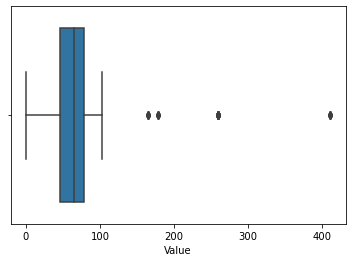

In [21]:
import seaborn as sns
sns.boxplot(df['Value'])

#### Total Area of Flat

In [22]:
df['TArea'] = df['Price'].apply(lambda x:x.split('L')[-1])

In [23]:
df['TArea']=df['TArea'].apply(lambda x:x.split('/')[0].strip('₹').replace(',',''))

In [24]:
df['TArea']=df['TArea'].replace(r'^\s*$',np.nan,regex=True)

In [25]:
df.head()

,Unnamed: 0,Building,Flat,Area,Location,Connectivity,Price,tflat,tbath,Value,TArea
0,0,Miravet District,2 BHK,842-869 sq.ft. (78-81 sq.m.) Carpet Area,2 BHK Apartment in Ravet,15,₹ 66.67 - 68.81 L,2,NaN,67.740,NaN
2,2,LMS Finswell Woods,2 BHK2 Baths,773-782 sq.ft. (72-73 sq.m.) Carpet Area,2 BHK Apartment in Viman Nagar,47,"₹ 98 - 99 L₹ 12,668/sq.ft.",2,2,98.500,12668
3,3,Mangal Shanti Mansha Phase 2,2 BHK2 Baths,640-700 sq.ft. (59-65 sq.m.) Carpet Area,2 BHK Apartment in Wagholi,13,"₹ 45.21 - 49.07 L₹ 7,036/sq.ft.",2,2,47.140,7036
4,4,Solitere Emerald Tower,2 BHK,741-805 sq.ft. (69-75 sq.m.) Carpet Area,2 BHK Apartment in Vadgaon Budruk,50,₹ 65 - 70.65 L,2,NaN,67.825,NaN
5,5,Kuber Antonia,2 BHK2 Baths,730 sq.ft. (68 sq.m.) Carpet Area,2 BHK Apartment in Wakad,48,₹ 66.57 L,2,2,66.570,NaN


### Carpet Area
- in sq.m.

In [26]:
scale = ['sq.ft','sq.yards','sq.m.', 'grounds', 'aankadam', 'rood','chataks','perch','guntha','ares']

def carea_ (x):
    if '(' in x:
        y = x.split('(')[1].split(')')[0].split(' ')[0].strip()
        if '-' in y:
            return (float(y.split('-')[0]) + float(y.split('-')[1]))/2
        else:
            return float(y)
    else:
        y = x.split(' ')[0]
        if '-' in y:
            return (float(y.split('-')[0]) + float(y.split('-')[1]))/2
        else:
            return float(y)

In [27]:
df['CArea in Sq.m.']=df['Area'].apply(carea_)

In [28]:
df.head()

,Unnamed: 0,Building,Flat,Area,Location,Connectivity,Price,tflat,tbath,Value,TArea,CArea in Sq.m.
0,0,Miravet District,2 BHK,842-869 sq.ft. (78-81 sq.m.) Carpet Area,2 BHK Apartment in Ravet,15,₹ 66.67 - 68.81 L,2,NaN,67.740,NaN,79.5
2,2,LMS Finswell Woods,2 BHK2 Baths,773-782 sq.ft. (72-73 sq.m.) Carpet Area,2 BHK Apartment in Viman Nagar,47,"₹ 98 - 99 L₹ 12,668/sq.ft.",2,2,98.500,12668,72.5
3,3,Mangal Shanti Mansha Phase 2,2 BHK2 Baths,640-700 sq.ft. (59-65 sq.m.) Carpet Area,2 BHK Apartment in Wagholi,13,"₹ 45.21 - 49.07 L₹ 7,036/sq.ft.",2,2,47.140,7036,62.0
4,4,Solitere Emerald Tower,2 BHK,741-805 sq.ft. (69-75 sq.m.) Carpet Area,2 BHK Apartment in Vadgaon Budruk,50,₹ 65 - 70.65 L,2,NaN,67.825,NaN,72.0
5,5,Kuber Antonia,2 BHK2 Baths,730 sq.ft. (68 sq.m.) Carpet Area,2 BHK Apartment in Wakad,48,₹ 66.57 L,2,2,66.570,NaN,68.0


<AxesSubplot:xlabel='CArea in Sq.m.'>

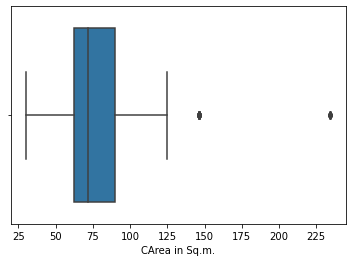

In [29]:
sns.boxplot(df['CArea in Sq.m.'])

#### Location

In [30]:
df['Location'] = df['Location'].apply(lambda x: x.split(' ')[-1])

In [31]:
df['Location'].isnull().sum()

0

In [32]:
df['Location'].nunique()

26

#### Cheking Nan

In [33]:
df.isnull().sum()

Unnamed: 0          0
Building            0
Flat                0
Area                0
Location            0
Connectivity        0
Price               0
tflat               0
tbath             539
Value               0
TArea             558
CArea in Sq.m.      0
dtype: int64

In [35]:
df = df[['Building','Location','tflat','CArea in Sq.m.','Connectivity','Value']]

In [36]:
df

,Building,Location,tflat,CArea in Sq.m.,Connectivity,Value
0,Miravet District,Ravet,2,79.5,15,67.740
2,LMS Finswell Woods,Nagar,2,72.5,47,98.500
3,Mangal Shanti Mansha Phase 2,Wagholi,2,62.0,13,47.140
4,Solitere Emerald Tower,Budruk,2,72.0,50,67.825
5,Kuber Antonia,Wakad,2,68.0,48,66.570
...,...,...,...,...,...,...
914,Elated Khushvista,NIBM,2,66.0,15,49.140
915,Aishwaryam Insignia,Punawale,2,62.0,5,48.800
917,Leisure Town,Hadapsar,2,69.0,7,83.000
918,Park Titan,Marunji,3,102.5,9,94.000


In [37]:
df.isnull().sum()

Building          0
Location          0
tflat             0
CArea in Sq.m.    0
Connectivity      0
Value             0
dtype: int64

In [38]:
df.describe()

,tflat,CArea in Sq.m.,Connectivity,Value
count,852.000000,852.000000,852.000000,852.000000
mean,2.183099,76.872066,15.454225,69.134002
std,0.595159,27.458666,12.271470,55.315937
min,1.000000,30.000000,4.000000,0.000000
25%,2.000000,62.000000,7.000000,46.340000
50%,2.000000,72.000000,14.000000,65.000000
75%,3.000000,90.000000,15.000000,78.335000
max,3.000000,234.500000,50.000000,411.000000


In [39]:
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stat

def plot(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].plot(kind='kde')
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

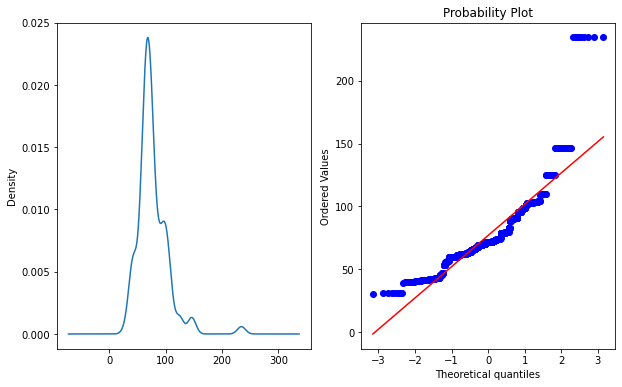

In [40]:
plot(df,'CArea in Sq.m.')

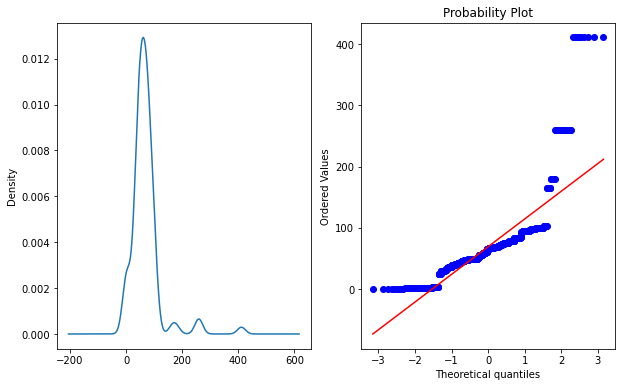

In [41]:
plot(df,'Value')

#### OUtlier Remove

<AxesSubplot:xlabel='Value', ylabel='Density'>

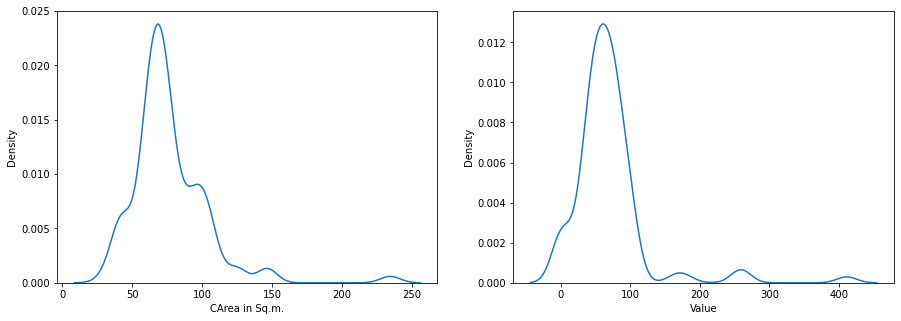

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['CArea in Sq.m.'],hist=False)
plt.subplot(1,2,2)
sns.distplot(df['Value'],hist=False)

#### Outlier Removal

In [43]:
Q1=df['CArea in Sq.m.'].quantile(0.25)
Q3=df['CArea in Sq.m.'].quantile(0.75)

IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

#### Trimming`

df=df[(df['CArea in Sq.m.']>lower_limit) & (df['CArea in Sq.m.']<upper_limit)]

<AxesSubplot:>

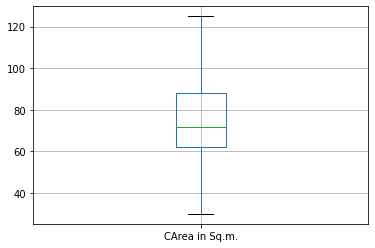

In [44]:
df[['CArea in Sq.m.']].boxplot()

In [45]:
df.shape

(823, 6)

In [46]:
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)

IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

#### Trimming`

df=df[(df['Value']>lower_limit) & (df['Value']<upper_limit)]

<AxesSubplot:>

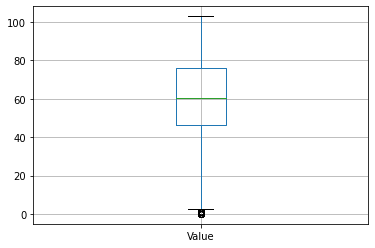

In [47]:
df[['Value']].boxplot()

In [48]:
df.shape

(806, 6)

In [49]:
df.head()

,Building,Location,tflat,CArea in Sq.m.,Connectivity,Value
0,Miravet District,Ravet,2,79.5,15,67.740
2,LMS Finswell Woods,Nagar,2,72.5,47,98.500
3,Mangal Shanti Mansha Phase 2,Wagholi,2,62.0,13,47.140
4,Solitere Emerald Tower,Budruk,2,72.0,50,67.825
5,Kuber Antonia,Wakad,2,68.0,48,66.570


#### OneHotEncoder using get_dummy = in df

In [52]:
final_df= pd.get_dummies(data=df,columns=['Location','Building'])

In [53]:
final_df.head()

,tflat,CArea in Sq.m.,Connectivity,Value,Location_Baner,Location_Bhosari,Location_Budruk,Location_Charholi,Location_Chinchwad,Location_Dhanori,...,Building_Samarth Mrudula Residency,Building_Shapoorji Joyville Hadapsar Annexe4.4 ★,Building_Shapoorji Joyville Sensorium,Building_Solitere Emerald Tower,Building_Tathawade Mhada,Building_Tirupati Nakshatra,Building_Townscape Sneh Mithila,Building_Unika,Building_Vansh Viva,Building_iLife Upper NIBM
0,2,79.5,15,67.740,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,72.5,47,98.500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,62.0,13,47.140,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,72.0,50,67.825,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,2,68.0,48,66.570,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### train test split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X=final_df.drop(columns=['Value'])
Y =final_df['Value']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=1)

### LinearRegression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

clf=LinearRegression()
clf.fit(xtrain,ytrain)

LinearRegression()

In [57]:
ypred=clf.predict(xtest)
print('r2_score = ',r2_score(ytest,ypred))
print('mean_absolute_error = ',mean_absolute_error(ytest,ypred))

r2_score =  0.6632372553009738
mean_absolute_error =  8.108536175184014


In [58]:
xtrain['lr_value'] = clf.predict(xtrain)
xtest['lr_value']= ypred

In [59]:
lr_df=xtrain.append(xtest)['lr_value']

In [60]:
lr_df.shape

(806,)

#### logistic Regression Prediction for every Value

In [61]:
new_df=df.join(lr_df,on=df.index,how='left')

In [62]:
new_df.head()

,Building,Location,tflat,CArea in Sq.m.,Connectivity,Value,lr_value
0,Miravet District,Ravet,2,79.5,15,67.740,67.739609
2,LMS Finswell Woods,Nagar,2,72.5,47,98.500,98.499329
3,Mangal Shanti Mansha Phase 2,Wagholi,2,62.0,13,47.140,47.139847
4,Solitere Emerald Tower,Budruk,2,72.0,50,67.825,67.824661
5,Kuber Antonia,Wakad,2,68.0,48,66.570,66.569687


In [63]:
new_df.shape

(806, 7)

### DecisionTreeRegressor

In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=1)

In [65]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [66]:
ypred=clf.predict(xtest)
# ypred

In [67]:
print('r2_score = ',r2_score(ytest,ypred))
print('mean_absolute_error = ',mean_absolute_error(ytest,ypred))

r2_score =  1.0
mean_absolute_error =  2.7305981167640214e-15


In [68]:
xtrain['dt_value'] = clf.predict(xtrain)
xtest['dt_value']= ypred

In [69]:
dt_df=xtrain.append(xtest)['dt_value']

#### DecisionTreeRegressor Prediction for every Value

In [70]:
new_df = new_df.join(dt_df,on=new_df.index,how='left')

In [71]:
new_df.head()

,Building,Location,tflat,CArea in Sq.m.,Connectivity,Value,lr_value,dt_value
0,Miravet District,Ravet,2,79.5,15,67.740,67.739609,67.740
2,LMS Finswell Woods,Nagar,2,72.5,47,98.500,98.499329,98.500
3,Mangal Shanti Mansha Phase 2,Wagholi,2,62.0,13,47.140,47.139847,47.140
4,Solitere Emerald Tower,Budruk,2,72.0,50,67.825,67.824661,67.825
5,Kuber Antonia,Wakad,2,68.0,48,66.570,66.569687,66.570


### RandomForestRegressor

In [72]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=1)

In [73]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(xtrain,ytrain)

RandomForestRegressor()

In [74]:
ypred = clf.predict(xtest)
print('r2_score = ',r2_score(ytest,ypred))
print('mean_absolute_error = ',mean_absolute_error(ytest,ypred))

r2_score =  0.999235747976347
mean_absolute_error =  0.21528842975210902


In [75]:
xtrain['rf_value'] = clf.predict(xtrain)
xtest['rf_value']= ypred

rf_df=xtrain.append(xtest)['rf_value']

# RandomForestRegressor Prediction for every Value

new_df = new_df.join(rf_df,on=new_df.index,how='left')

In [76]:
new_df.head()

,Building,Location,tflat,CArea in Sq.m.,Connectivity,Value,lr_value,dt_value,rf_value
0,Miravet District,Ravet,2,79.5,15,67.740,67.739609,67.740,67.740
2,LMS Finswell Woods,Nagar,2,72.5,47,98.500,98.499329,98.500,98.500
3,Mangal Shanti Mansha Phase 2,Wagholi,2,62.0,13,47.140,47.139847,47.140,47.140
4,Solitere Emerald Tower,Budruk,2,72.0,50,67.825,67.824661,67.825,67.825
5,Kuber Antonia,Wakad,2,68.0,48,66.570,66.569687,66.570,66.570


In [77]:
new_df.reset_index(inplace=True,drop=True)

In [78]:
new_df.to_csv('PropertyValueML.csv')

##### PIPELINE

In [66]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,PowerTransformer, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [67]:
X = final_df.drop(columns=['Value'])
Y = final_df['Value']

In [68]:
X.head()

,tflat,CArea in Sq.m.,Location_Baner,Location_Bhosari,Location_Bhukum,Location_Budruk,Location_Charholi,Location_Chinchwad,Location_Chowk,Location_Dhanori,...,Buiding_Shapoorji Joyville Sensorium,Buiding_Shivam 19 Grand West,Buiding_Shree Enterprises Sparsh,Buiding_Tathawade Mhada,Buiding_Townscape Sneh Mithila,Buiding_Unika,Buiding_VTP Euphoria,Buiding_Vansh Viva,Buiding_Waghere Subhadra Heights,Buiding_iLife Upper NIBM
0,2,79.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,72.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,62.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,60.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,69.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
Y

0      67.740
1      98.500
2      47.140
3      46.340
4      55.000
        ...  
705    59.130
706    88.810
707    75.805
708    55.080
709    27.030
Name: Value, Length: 710, dtype: float64

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [71]:
trf1=ColumnTransformer(transformers=[
    ('scaler', MinMaxScaler(),slice(1,10))
])

In [72]:
trf2=DecisionTreeRegressor()

In [73]:
pipe=make_pipeline(trf1,trf2)

In [74]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  slice(1, 10, None))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [75]:
ypred=pipe.predict(xtest)

In [76]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.8394996331538339

In [77]:
trf2=RandomForestRegressor()
pipe=make_pipeline(trf1,trf2)
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
r2_score(ytest,ypred)

0.829323057673492